# <font color='#eb3483'> Clustering Harambee Data </font>

### Loading ...

In [66]:
# import useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv("processed_data_01012021.csv")
#display top 5 rows
df.head()

,Unnamed: 0,unid,cft_score,opt_score,com_score,grit_score,num_score,survey_date_month,survey_num,gender,...,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,1,41964,4.0,NaN,4.0,4.0,NaN,2018-06-01,1,Female,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,True
1,2,15241,4.0,7.0,5.0,3.0,NaN,2016-03-01,1,Female,...,2,NaN,3,1,True,True,2,8,False,True
2,3,33702,5.0,3.0,5.0,2.0,NaN,2016-04-01,1,Male,...,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,4,101252,10.0,4.0,NaN,0.0,NaN,2018-04-01,1,Female,...,7,5,0,NaN,True,True,1 (Worst possible financial situation),7,False,True
4,5,83023,7.0,NaN,NaN,4.0,NaN,2016-07-01,1,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


### Overview

In [68]:
df.shape[0]

51262

In [69]:
#view percent missing data
missing = df.isnull().sum() / df.shape[0] * 100
missing

Unnamed: 0                     0.000000
unid                           0.000000
cft_score                     35.858921
opt_score                     55.056377
com_score                     62.258593
grit_score                    35.858921
num_score                     77.931021
survey_date_month              0.000000
survey_num                     0.000000
gender                         0.044868
dob                            0.314073
province                      62.510242
peoplelive                    37.831142
peoplelive_15plus             76.569389
numchildren                   38.102298
numearnincome                 63.337365
anygrant                      10.171277
anyhhincome                   10.171277
financial_situation_now       39.813117
financial_situation_5years    39.813117
givemoney_yes                 39.179119
working                        0.000000
dtype: float64

In [70]:
len(df.peoplelive.unique())

22

In [71]:
#find columns with more than 50% missing data
missing_50 = missing.index[missing > 50]
missing_50

Index(['opt_score', 'com_score', 'num_score', 'province', 'peoplelive_15plus',
       'numearnincome'],
      dtype='object')

In [72]:
#drop columns with more than 50% missing data
df = df.drop(list(missing_50), axis=1)
df.head()

,Unnamed: 0,unid,cft_score,grit_score,survey_date_month,survey_num,gender,dob,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,1,41964,4.0,4.0,2018-06-01,1,Female,1992-02-01,NaN,NaN,False,False,NaN,NaN,NaN,True
1,2,15241,4.0,3.0,2016-03-01,1,Female,1988-11-01,2,3,True,True,2,8,False,True
2,3,33702,5.0,2.0,2016-04-01,1,Male,1991-04-01,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,4,101252,10.0,0.0,2018-04-01,1,Female,1998-09-01,7,0,True,True,1 (Worst possible financial situation),7,False,True
4,5,83023,7.0,4.0,2016-07-01,1,Male,1995-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [73]:
#drop unnecessary columns
df = df.drop(['Unnamed: 0', 'unid', 'survey_num'], axis=1)
df.head()

,cft_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,4.0,4.0,2018-06-01,Female,1992-02-01,NaN,NaN,False,False,NaN,NaN,NaN,True
1,4.0,3.0,2016-03-01,Female,1988-11-01,2,3,True,True,2,8,False,True
2,5.0,2.0,2016-04-01,Male,1991-04-01,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,10.0,0.0,2018-04-01,Female,1998-09-01,7,0,True,True,1 (Worst possible financial situation),7,False,True
4,7.0,4.0,2016-07-01,Male,1995-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [74]:
type(df.survey_date_month[0])

str

In [75]:
#convert survey_date_month to date object
df['survey_date_month']= pd.to_datetime(df['survey_date_month'])
df.head()

,cft_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,4.0,4.0,2018-06-01,Female,1992-02-01,NaN,NaN,False,False,NaN,NaN,NaN,True
1,4.0,3.0,2016-03-01,Female,1988-11-01,2,3,True,True,2,8,False,True
2,5.0,2.0,2016-04-01,Male,1991-04-01,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,10.0,0.0,2018-04-01,Female,1998-09-01,7,0,True,True,1 (Worst possible financial situation),7,False,True
4,7.0,4.0,2016-07-01,Male,1995-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [76]:
type(df.survey_date_month[0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
#convert dob to date object
df['dob'] = pd.to_datetime(df['dob'])
df.head()

,cft_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working
0,4.0,4.0,2018-06-01,Female,1992-02-01,NaN,NaN,False,False,NaN,NaN,NaN,True
1,4.0,3.0,2016-03-01,Female,1988-11-01,2,3,True,True,2,8,False,True
2,5.0,2.0,2016-04-01,Male,1991-04-01,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True
3,10.0,0.0,2018-04-01,Female,1998-09-01,7,0,True,True,1 (Worst possible financial situation),7,False,True
4,7.0,4.0,2016-07-01,Male,1995-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [78]:
#create variable for age at first survey
df['age_first_survey'] = pd.DatetimeIndex(df['survey_date_month']).year - pd.DatetimeIndex(df['dob']).year
df.head()

,cft_score,grit_score,survey_date_month,gender,dob,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,4.0,4.0,2018-06-01,Female,1992-02-01,NaN,NaN,False,False,NaN,NaN,NaN,True,26.0
1,4.0,3.0,2016-03-01,Female,1988-11-01,2,3,True,True,2,8,False,True,28.0
2,5.0,2.0,2016-04-01,Male,1991-04-01,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True,25.0
3,10.0,0.0,2018-04-01,Female,1998-09-01,7,0,True,True,1 (Worst possible financial situation),7,False,True,20.0
4,7.0,4.0,2016-07-01,Male,1995-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,21.0


In [79]:
#drop date columns
df = df.drop(['dob', 'survey_date_month'], axis=1)
df.head()

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,4.0,4.0,Female,NaN,NaN,False,False,NaN,NaN,NaN,True,26.0
1,4.0,3.0,Female,2,3,True,True,2,8,False,True,28.0
2,5.0,2.0,Male,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True,25.0
3,10.0,0.0,Female,7,0,True,True,1 (Worst possible financial situation),7,False,True,20.0
4,7.0,4.0,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,21.0


In [80]:
df.shape

(51262, 12)

In [81]:
df[df['cft_score'].isnull()].tail()

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
51257,NaN,NaN,Female,NaN,NaN,False,False,NaN,NaN,NaN,False,23.0
51258,NaN,NaN,Female,NaN,NaN,False,False,NaN,NaN,NaN,False,22.0
51259,NaN,NaN,Male,NaN,NaN,False,False,NaN,NaN,NaN,False,26.0
51260,NaN,NaN,Male,5,0,True,False,5,7,True,False,26.0
51261,NaN,NaN,Male,5,0,False,True,1 (Worst possible financial situation),5,False,False,21.0


In [82]:
df = df[~(df.cft_score.isnull() & df.grit_score.isnull())]
df.shape

(32880, 12)

In [83]:
#imputation: replacing with mode 
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
df.head()

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,4.0,4.0,Female,4,0,False,False,1 (Worst possible financial situation),10 (Best possible financial situation),False,True,26.0
1,4.0,3.0,Female,2,3,True,True,2,8,False,True,28.0
2,5.0,2.0,Male,4,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False,True,25.0
3,10.0,0.0,Female,7,0,True,True,1 (Worst possible financial situation),7,False,True,20.0
4,7.0,4.0,Male,4,0,False,True,1 (Worst possible financial situation),10 (Best possible financial situation),False,False,21.0


In [84]:
df.financial_situation_5years.unique()

array(['10 (Best possible financial situation)', '8',
       '1 (Worst possible financial situation)', '7', '6', '5', '9', '4',
       '2', '3'], dtype=object)

In [85]:
#extract numeric value from financial_situation_5years
df['financial_situation_5years'] = df['financial_situation_5years'].str.extract('(\d+)', expand=False)
df['financial_situation_5years'].head()

0    10
1     8
2     1
3     7
4    10
Name: financial_situation_5years, dtype: object

In [86]:
#extract numeric value from financial_situation_now
df['financial_situation_now'] = df['financial_situation_now'].str.extract('(\d+)', expand=False)
df['financial_situation_now'].head()

0    1
1    2
2    1
3    1
4    1
Name: financial_situation_now, dtype: object

In [87]:
df['peoplelive'].unique()

array(['4', '2', '7', '1', '3', '5', '8', '13', '6', '9',
       '0: I live alone', '11', '15 or more', '10', '0', '12', '14',
       'More than 15', '15', '20', '22'], dtype=object)

In [88]:
#extract numeric value from peoplelive
df['peoplelive'] = df['peoplelive'].str.extract('(\d+)', expand=False)
df['peoplelive'].head()

0    4
1    2
2    4
3    7
4    4
Name: peoplelive, dtype: object

In [89]:
df['numchildren'].unique()

array(['0', '3', '1', '2', '4 or more', '4more'], dtype=object)

In [90]:
#extract numeric value from numchildren
df['numchildren'] = df['numchildren'].str.extract('(\d+)', expand=False)
df['numchildren'].head()

0    0
1    3
2    1
3    0
4    0
Name: numchildren, dtype: object

In [91]:
#binarise gender
df["gender"] = (df["gender"] == "Female").astype(int)
df.head()
#label encoding

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,4.0,4.0,1,4,0,False,False,1,10,False,True,26.0
1,4.0,3.0,1,2,3,True,True,2,8,False,True,28.0
2,5.0,2.0,0,4,1,False,True,1,1,False,True,25.0
3,10.0,0.0,1,7,0,True,True,1,7,False,True,20.0
4,7.0,4.0,0,4,0,False,True,1,10,False,False,21.0


In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
#binarise anygrant, anyhhincome, givemoney_yes, working
df["anygrant"] = le.fit_transform(df["anygrant"])
df["anyhhincome"] = le.fit_transform(df["anyhhincome"])
df["givemoney_yes"] = le.fit_transform(df["givemoney_yes"])
df["working"] = le.fit_transform(df["working"])


In [94]:
df.working.value_counts()

0    21964
1    10916
Name: working, dtype: int64

### k-means

In [95]:
#scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)


MinMaxScaler()

In [96]:
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(             
                    df_scaled,
                    columns=df.columns) 

df_scaled.head()

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey
0,0.333333,0.444444,1.0,0.181818,0.00,0.0,0.0,0.000000,1.000000,0.0,1.0,0.204545
1,0.333333,0.333333,1.0,0.090909,0.75,1.0,1.0,0.111111,0.777778,0.0,1.0,0.250000
2,0.444444,0.222222,0.0,0.181818,0.25,0.0,1.0,0.000000,0.000000,0.0,1.0,0.181818
3,1.000000,0.000000,1.0,0.318182,0.00,1.0,1.0,0.000000,0.666667,0.0,1.0,0.068182
4,0.666667,0.444444,0.0,0.181818,0.00,0.0,1.0,0.000000,1.000000,0.0,0.0,0.090909


In [97]:
from sklearn.cluster import KMeans

In [98]:
#fit k means to data
estimator_kmeans = KMeans(random_state=42, n_clusters=9) 

estimator_kmeans.fit(df_scaled) 

KMeans(n_clusters=9, random_state=42)

In [99]:
#apply model to data
estimator_kmeans.predict(df_scaled)

array([5, 8, 5, ..., 3, 7, 8], dtype=int32)

In [100]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[ 5.55368500e-01,  4.90927796e-01,  8.77076189e-15,
         2.08256811e-01,  7.91245791e-02,  6.94865320e-01,
         8.71632997e-01,  1.71436588e-01,  7.58417508e-01,
         7.58838384e-01,  1.00000000e+00,  1.69325834e-01],
       [ 4.75355477e-01,  4.96768392e-01,  1.00000000e+00,
         2.30859429e-01,  1.61418816e-01,  1.00000000e+00,
         7.85280728e-01,  1.48738268e-01,  7.76316529e-01,
         3.33066907e-16,  2.99760217e-15,  1.60522141e-01],
       [ 4.64699994e-01,  5.01324854e-01,  1.00000000e+00,
         1.64197620e-01,  2.68945416e-02, -4.77395901e-15,
         1.56541446e-14,  2.61437908e-02,  9.62815757e-01,
         5.06094330e-02,  2.10942375e-15,  2.00540781e-01],
       [ 4.84303858e-01,  4.96418777e-01,  1.00000000e+00,
         1.62974098e-01,  8.15959741e-02, -4.88498131e-15,
         1.00000000e+00,  1.15158293e-01,  8.55313257e-01,
         2.11838006e-01,  3.99680289e-15,  1.72995229e-01],
       [ 5.49884714e-01,  5.00342743e-01,  4.2188474

In [101]:
#metrics on data
centroids.shape

(9, 12)

In [102]:
estimator_kmeans.inertia_

19040.418349512427

In [103]:
estimator_kmeans.labels_.shape

(32880,)

In [104]:
df_scaled.shape

(32880, 12)

In [105]:
df_scaled["cluster_id"] = estimator_kmeans.labels_ 

In [106]:
#preview scaled data
df_scaled.head()

,cft_score,grit_score,gender,peoplelive,numchildren,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes,working,age_first_survey,cluster_id
0,0.333333,0.444444,1.0,0.181818,0.00,0.0,0.0,0.000000,1.000000,0.0,1.0,0.204545,5
1,0.333333,0.333333,1.0,0.090909,0.75,1.0,1.0,0.111111,0.777778,0.0,1.0,0.250000,8
2,0.444444,0.222222,0.0,0.181818,0.25,0.0,1.0,0.000000,0.000000,0.0,1.0,0.181818,5
3,1.000000,0.000000,1.0,0.318182,0.00,1.0,1.0,0.000000,0.666667,0.0,1.0,0.068182,8
4,0.666667,0.444444,0.0,0.181818,0.00,0.0,1.0,0.000000,1.000000,0.0,0.0,0.090909,4


In [107]:
df_scaled.cluster_id.value_counts()

7    4407
5    4366
3    4173
1    3954
2    3774
4    3566
8    3147
6    3117
0    2376
Name: cluster_id, dtype: int64

In [108]:
def cluster_summary(cluster_id):  # define a function and call it cluster_summary, that takes the input of a cluster id/label
    cluster = df_scaled[df_scaled.cluster_id==cluster_id] # pull out all the rows with that ID
    cluster_summary = cluster.mean().to_dict() # get means for numerical (only does for numerical if we didnt specify)
    return cluster_summary 

In [109]:
#display cluster summary
cluster_summary(5)

{'cft_score': 0.5203084440372621,
 'grit_score': 0.50114521300962,
 'gender': 0.728126431516262,
 'peoplelive': 0.15860159080497357,
 'numchildren': 0.0570888685295465,
 'anygrant': 0.0,
 'anyhhincome': 0.7123224919835089,
 'financial_situation_now': 0.09517992568839996,
 'financial_situation_5years': 0.8821194075431313,
 'givemoney_yes': 0.1294090700870362,
 'working': 1.0,
 'age_first_survey': 0.18387435972181737,
 'cluster_id': 5.0}

In [110]:
#create frame for cluster summary
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [111]:
cluster_comparison(0,1,2,3,4,5,6,7,8)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
cft_score,0.555368,0.475355,0.464700,0.484304,0.549885,0.520308,0.529890,0.486297,0.494757
grit_score,0.490928,0.496768,0.501325,0.496419,0.500343,0.501145,0.502549,0.503265,0.499276
gender,0.000000,1.000000,1.000000,1.000000,0.000000,0.728126,0.000000,0.658952,1.000000
peoplelive,0.208257,0.230859,0.164198,0.162974,0.177433,0.158602,0.154228,0.239093,0.230523
numchildren,0.079125,0.161419,0.026895,0.081596,0.044728,0.057089,0.029917,0.171942,0.200588
anygrant,0.694865,1.000000,0.000000,0.000000,0.260516,0.000000,0.134103,1.000000,1.000000
anyhhincome,0.871633,0.785281,0.000000,1.000000,1.000000,0.712322,0.000000,0.777627,0.786146
financial_situation_now,0.171437,0.148738,0.026144,0.115158,0.137284,0.095180,0.054041,0.165948,0.166967
financial_situation_5years,0.758418,0.776317,0.962816,0.855313,0.807285,0.882119,0.908459,0.773189,0.782368
givemoney_yes,0.758838,0.000000,0.050609,0.211838,0.259114,0.129409,0.084055,1.000000,0.475373


In [112]:
 """assigns clusters to every row in the dataframe via kmeans"""
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

 """produces summary of clusters"""
def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1)
    return cluster_summary[sorted(cluster_summary.columns)]

In [113]:
cluster_results = kmeans_cluster(df_scaled, 9)

In [114]:
cluster_summary = graph_summary_clustering(cluster_results)

In [115]:
cluster_summary

,Cluster,age_first_survey,anygrant,anyhhincome,cft_score,cluster_id,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
0,0,0.169326,0.694865,0.871633,0.555368,0,0.758418,0.171437,0.000000,0.758838,0.490928,0.079125,0.208257,1.000000
1,1,0.173477,1.000000,0.786146,0.494757,8,0.782368,0.166967,1.000000,0.475373,0.499276,0.200588,0.230523,1.000000
2,2,0.200541,0.000000,0.000000,0.464700,2,0.962816,0.026144,1.000000,0.050609,0.501325,0.026895,0.164198,0.000000
3,3,0.185843,0.134103,0.000000,0.529890,6,0.908459,0.054041,0.000000,0.084055,0.502549,0.029917,0.154228,0.329483
4,4,0.160522,1.000000,0.785281,0.475355,1,0.776317,0.148738,1.000000,0.000000,0.496768,0.161419,0.230859,0.000000
5,5,0.183874,0.000000,0.712322,0.520308,5,0.882119,0.095180,0.728126,0.129409,0.501145,0.057089,0.158602,1.000000
6,6,0.174975,1.000000,0.777627,0.486297,7,0.773189,0.165948,0.658952,1.000000,0.503265,0.171942,0.239093,0.000000
7,7,0.172995,0.000000,1.000000,0.484304,3,0.855313,0.115158,1.000000,0.211838,0.496419,0.081596,0.162974,0.000000
8,8,0.155414,0.260516,1.000000,0.549885,4,0.807285,0.137284,0.000000,0.259114,0.500343,0.044728,0.177433,0.000000


In [116]:
df_cluster = pd.DataFrame(cluster_summary)

In [117]:
df_cluster.head()

,Cluster,age_first_survey,anygrant,anyhhincome,cft_score,cluster_id,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
0,0,0.169326,0.694865,0.871633,0.555368,0,0.758418,0.171437,0.0,0.758838,0.490928,0.079125,0.208257,1.000000
1,1,0.173477,1.000000,0.786146,0.494757,8,0.782368,0.166967,1.0,0.475373,0.499276,0.200588,0.230523,1.000000
2,2,0.200541,0.000000,0.000000,0.464700,2,0.962816,0.026144,1.0,0.050609,0.501325,0.026895,0.164198,0.000000
3,3,0.185843,0.134103,0.000000,0.529890,6,0.908459,0.054041,0.0,0.084055,0.502549,0.029917,0.154228,0.329483
4,4,0.160522,1.000000,0.785281,0.475355,1,0.776317,0.148738,1.0,0.000000,0.496768,0.161419,0.230859,0.000000


In [118]:
del df_cluster['Cluster']

In [119]:
df_cluster.head()

,age_first_survey,anygrant,anyhhincome,cft_score,cluster_id,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
0,0.169326,0.694865,0.871633,0.555368,0,0.758418,0.171437,0.0,0.758838,0.490928,0.079125,0.208257,1.000000
1,0.173477,1.000000,0.786146,0.494757,8,0.782368,0.166967,1.0,0.475373,0.499276,0.200588,0.230523,1.000000
2,0.200541,0.000000,0.000000,0.464700,2,0.962816,0.026144,1.0,0.050609,0.501325,0.026895,0.164198,0.000000
3,0.185843,0.134103,0.000000,0.529890,6,0.908459,0.054041,0.0,0.084055,0.502549,0.029917,0.154228,0.329483
4,0.160522,1.000000,0.785281,0.475355,1,0.776317,0.148738,1.0,0.000000,0.496768,0.161419,0.230859,0.000000


In [120]:
#apply min/max scaler to clusters
scaler.fit(df_cluster)

MinMaxScaler()

In [121]:
df_cluster_scaled = scaler.transform(df_cluster)
df_cluster_scaled = pd.DataFrame(             
                    df_cluster_scaled,
                    columns=df_cluster.columns) 

df_cluster_scaled.head()

,age_first_survey,anygrant,anyhhincome,cft_score,cluster_id,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
0,0.308291,0.694865,0.871633,1.000000,0.000,0.000000,1.000000,0.0,0.758838,0.000000,0.300703,0.636648,1.000000
1,0.400277,1.000000,0.786146,0.331503,1.000,0.117174,0.969236,1.0,0.475373,0.676685,1.000000,0.899014,1.000000
2,1.000000,0.000000,0.000000,0.000000,0.250,1.000000,0.000000,1.0,0.050609,0.842740,0.000000,0.117481,0.000000
3,0.674305,0.134103,0.000000,0.718991,0.750,0.734064,0.192004,0.0,0.084055,0.941943,0.017399,0.000000,0.329483
4,0.113205,1.000000,0.785281,0.117521,0.125,0.087569,0.843775,1.0,0.000000,0.473413,0.774493,0.902983,0.000000


In [122]:
#sort by cluster id
df_cluster_scaled.sort_values('cluster_id')

,age_first_survey,anygrant,anyhhincome,cft_score,cluster_id,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
0,0.308291,0.694865,0.871633,1.000000,0.000,0.000000,1.000000,0.000000,0.758838,0.000000,0.300703,0.636648,1.000000
4,0.113205,1.000000,0.785281,0.117521,0.125,0.087569,0.843775,1.000000,0.000000,0.473413,0.774493,0.902983,0.000000
2,1.000000,0.000000,0.000000,0.000000,0.250,1.000000,0.000000,1.000000,0.050609,0.842740,0.000000,0.117481,0.000000
7,0.389603,0.000000,1.000000,0.216215,0.375,0.474054,0.612656,1.000000,0.211838,0.445075,0.314931,0.103064,0.000000
8,0.000000,0.260516,1.000000,0.939518,0.500,0.239079,0.764941,0.000000,0.259114,0.763134,0.102672,0.273443,0.000000
5,0.630680,0.000000,0.712322,0.613316,0.625,0.605200,0.475152,0.728126,0.129409,0.828179,0.173837,0.051541,1.000000
3,0.674305,0.134103,0.000000,0.718991,0.750,0.734064,0.192004,0.000000,0.084055,0.941943,0.017399,0.000000,0.329483
6,0.433468,1.000000,0.777627,0.238198,0.875,0.072269,0.962225,0.658952,1.000000,1.000000,0.835080,1.000000,0.000000
1,0.400277,1.000000,0.786146,0.331503,1.000,0.117174,0.969236,1.000000,0.475373,0.676685,1.000000,0.899014,1.000000


In [123]:
#set index to cluster id
df_cluster_scaled.set_index('cluster_id')

,age_first_survey,anygrant,anyhhincome,cft_score,financial_situation_5years,financial_situation_now,gender,givemoney_yes,grit_score,numchildren,peoplelive,working
cluster_id,,,,,,,,,,,,
0.000,0.308291,0.694865,0.871633,1.000000,0.000000,1.000000,0.000000,0.758838,0.000000,0.300703,0.636648,1.000000
1.000,0.400277,1.000000,0.786146,0.331503,0.117174,0.969236,1.000000,0.475373,0.676685,1.000000,0.899014,1.000000
0.250,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.050609,0.842740,0.000000,0.117481,0.000000
0.750,0.674305,0.134103,0.000000,0.718991,0.734064,0.192004,0.000000,0.084055,0.941943,0.017399,0.000000,0.329483
0.125,0.113205,1.000000,0.785281,0.117521,0.087569,0.843775,1.000000,0.000000,0.473413,0.774493,0.902983,0.000000
0.625,0.630680,0.000000,0.712322,0.613316,0.605200,0.475152,0.728126,0.129409,0.828179,0.173837,0.051541,1.000000
0.875,0.433468,1.000000,0.777627,0.238198,0.072269,0.962225,0.658952,1.000000,1.000000,0.835080,1.000000,0.000000
0.375,0.389603,0.000000,1.000000,0.216215,0.474054,0.612656,1.000000,0.211838,0.445075,0.314931,0.103064,0.000000
0.500,0.000000,0.260516,1.000000,0.939518,0.239079,0.764941,0.000000,0.259114,0.763134,0.102672,0.273443,0.000000


In [124]:
cluster_summary = df_cluster_scaled

In [125]:
import seaborn as sns

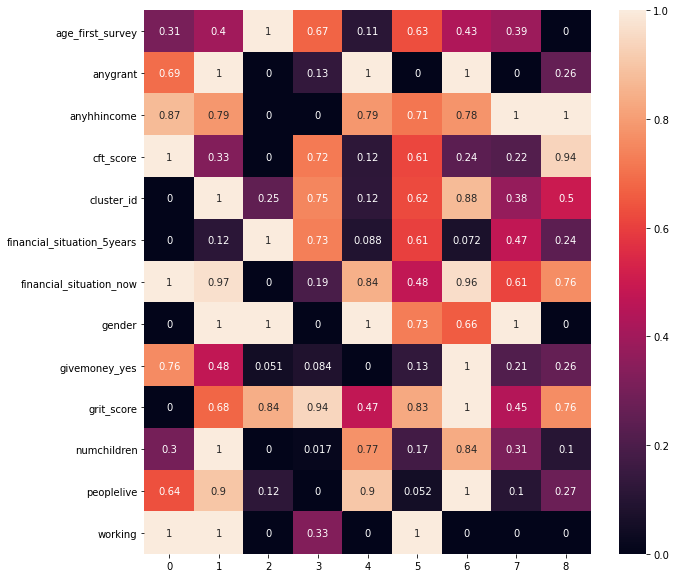

In [126]:
#visualize cluster attributes
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary.transpose(), annot=True);

In [127]:
"""find k means inertia"""
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(df_scaled)
    return estimator_kmeans.inertia_

In [128]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
CPU times: user 9.65 s, sys: 1.31 s, total: 11 s
Wall time: 4.07 s


In [129]:
results_k

{2: 93980.82182814307,
 3: 61669.25630704786,
 4: 46165.96688193248,
 5: 37197.31321012505,
 8: 23038.19850594652,
 10: 17989.958767573047,
 15: 14162.463110978391,
 20: 11288.579645788795,
 25: 9251.3552467426,
 30: 8341.415040064128}

In [130]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


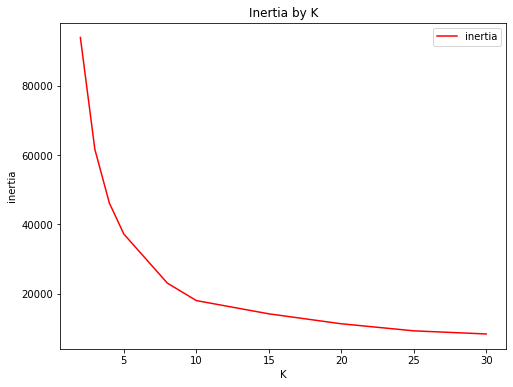

In [131]:
#visualize k mean inertia
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend()


In [132]:
#import metrics
from sklearn.metrics import (
                            homogeneity_completeness_v_measure, 
                            adjusted_rand_score, 
                            calinski_harabasz_score,
                            silhouette_score
)

In [133]:
#homogeneity, completeness, measure
homogeneity_completeness_v_measure(df_scaled['working'], df_scaled['cluster_id'])

(0.9054647803229342, 0.26382678361579315, 0.4085993058314725)

In [134]:
#adjusted rand score
adjusted_rand_score(df_scaled['working'], df_scaled['cluster_id'])

0.17218451951229943

In [135]:
#calinski harabasz score, high
calinski_harabasz_score(df_scaled, df_scaled['cluster_id'])

48875.662973769584

In [136]:
#silhouette score, high
silhouette_score(df_scaled, df_scaled['cluster_id'])

0.46111772667789797